#Campus Recruitment Prediction With Machine Learning for MBA Students


 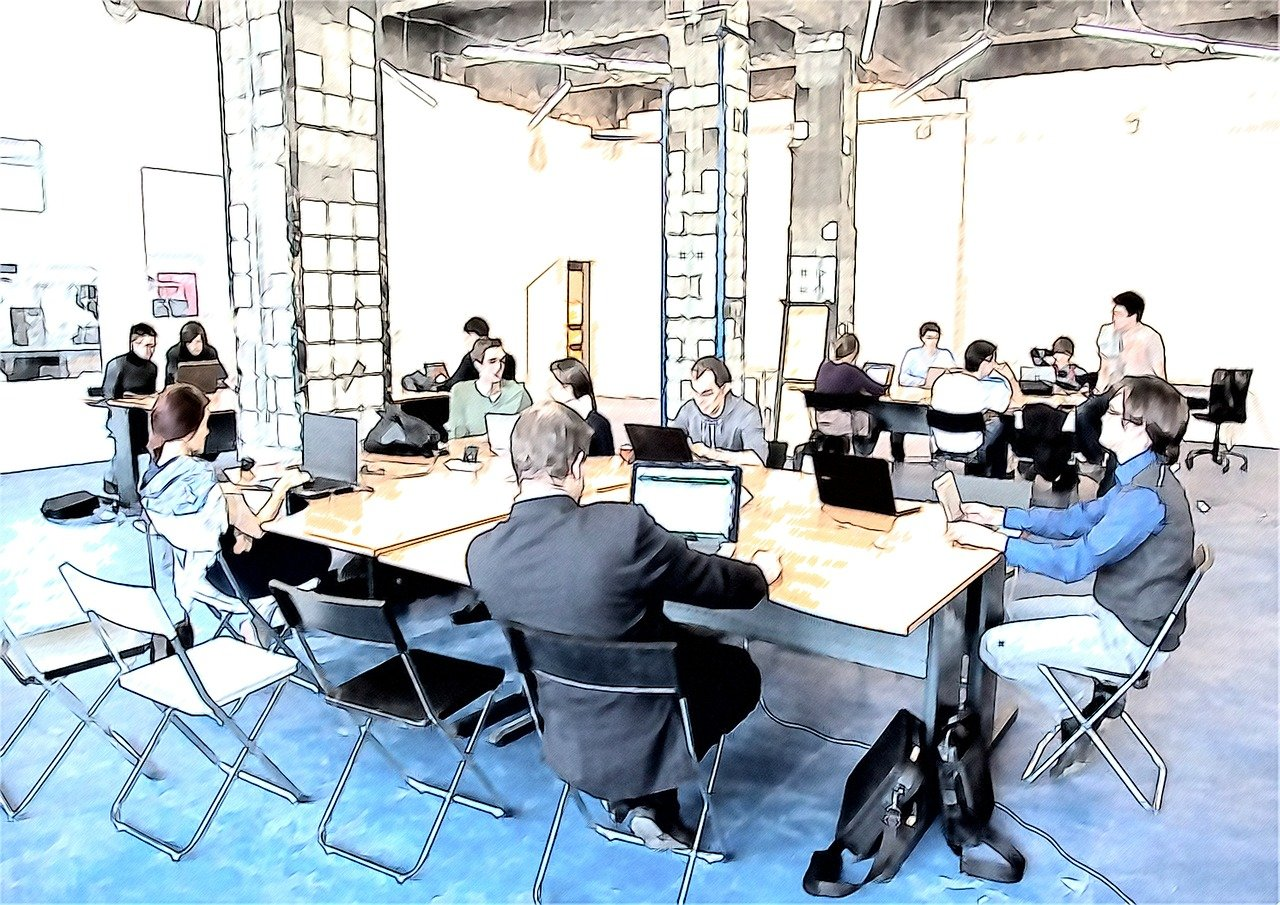

**Student Name:De Zoysa R.N.C.** <br>
**Registration Number:EG/2020/3886** <br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [1]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import missingno as msno

## Data Loading

In [19]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# Your code goes here
df = pd.read_csv('Placement_Data_Full_Class.csv')
# Print the first five rows of the loaded dataframe
# Your code goes here
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [20]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here

df.drop('sl_no', axis=1, inplace=True)

# Display the first five rows of the dataset to confirm 'sl_no' column is dropped
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Exploratory Data Analysis (EDA)

In [21]:
# Identify the shape of the loaded dataframe

# Your code goes here

shape = df.shape

# Printing the shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.")

The dataset has 215 rows and 14 columns.


In [22]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:The Categorical Features: 
gender,
ssc_b,
hsc_b,
hsc_s,
degree_t,
workex,
specialisation,
status**

>**A: Numerical Features: ssc_p,
hsc_p,
degree_p,
etest_p,
mba_p,
salary**


In [23]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here

numerical_summary = df.describe()

# Displaying the descriptive statistics
numerical_summary


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A: Visualizing only the training data allows us to observe the patterns, distributions, and relationships within the data that the model is exposed to during its training phase. This approach ensures that our insights and potential adjustments to the model are based on the same information that is used to train the model, which can help in enhancing its performance on unseen data by making informed decisions on feature engineering, model selection, and hyperparameter tuning without introducing bias from the test set.**

In [24]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here

from sklearn.model_selection import train_test_split

X = df.drop('status', axis=1)  # Features (independent variables)
y = df['status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Print number of training data points

# Your code goes here

print("Number of training data points:", X_train.shape[0])

Number of training data points: 172


In [26]:
# Print number of testing data points

# Your code goes here
print("Number of training data points:", X_test.shape[0])

Number of training data points: 43


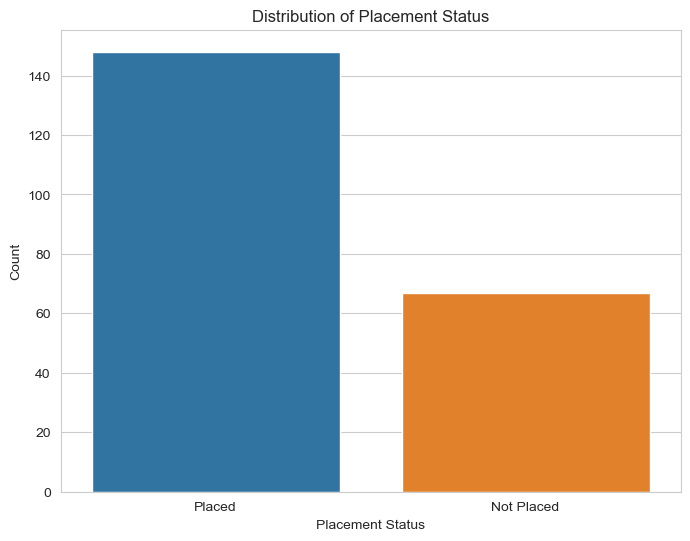

In [27]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here


plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)
plt.title('Distribution of Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.show()

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br>
1. **Biased Model:** In the presence of imbalanced datasets, machine learning models tend to develop a bias towards the more prevalent class. This occurs because the algorithm has been exposed to more instances of the majority class during training, making it more proficient in recognizing and predicting these instances compared to the minority class. Consequently, this bias can significantly diminish the model's ability to identify and accurately predict instances of the less represented class.<br>
2. **Poor Generalization:** Imbalanced datasets can result in models that poorly generalize to unseen data, especially for the minority class. The model may perform well on the training data but fail to generalize to new data, particularly instances from the minority class.<br>
3. **Misleading Evaluation Metrics:** When datasets are imbalanced, standard evaluation metrics like accuracy become unreliable and potentially misleading. In extreme cases of imbalance, a model could achieve a high accuracy rate by merely predicting every instance as the majority class, ignoring the minority class altogether. This scenario underscores the importance of adopting more nuanced metrics such as precision, recall, F1 score, and the Area Under the Receiver Operating Characteristic (ROC-AUC) curve. These metrics offer a more comprehensive evaluation by considering the model's performance across both classes, thereby providing insights into its ability to handle imbalanced data effectively.<br>



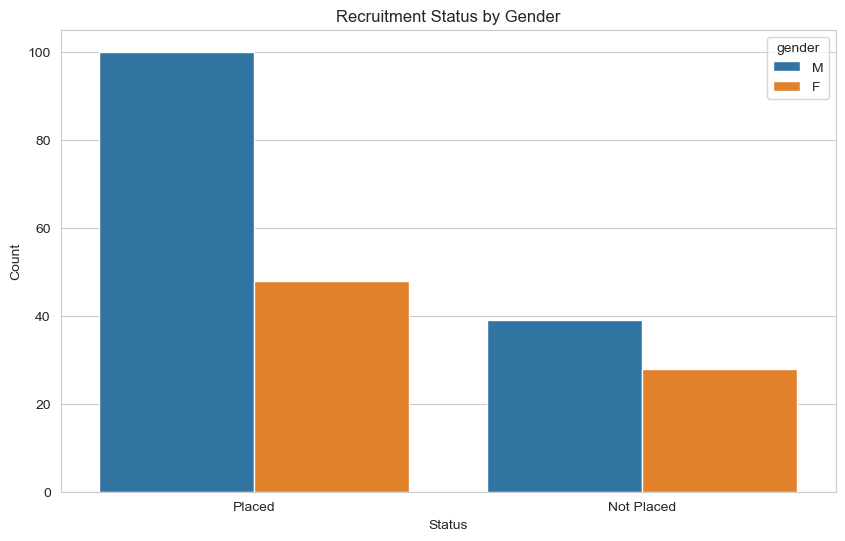

In [28]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here

sns.set_style("whitegrid")

# Creating a countplot for the recruitment status with a hue based on Gender
plt.figure(figsize=(10, 6))  # Setting the figure size for better readability
sns.countplot(x='status', hue='gender', data=df)  # Ensure 'dataset' is your DataFrame

# Adding plot title and labels for clarity
plt.title('Recruitment Status by Gender')
plt.xlabel('Status')
plt.ylabel('Count')

# Displaying the plot
plt.show()

**Q:** Explain the observation from the above table.
> **A:**The observation reveals a gender disparity in placement outcomes, with more males placed compared to females. This suggests potential biases in recruitment, highlighting the need for fairer practices to ensure equal opportunities for all genders.

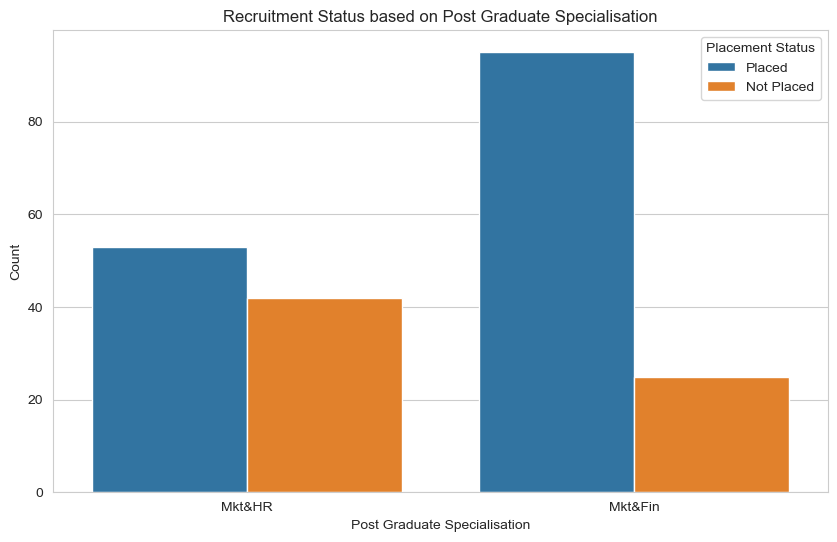

In [29]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here

plt.figure(figsize=(10, 6))
sns.countplot(x='specialisation', hue='status', data=df)
plt.title('Recruitment Status based on Post Graduate Specialisation')
plt.xlabel('Post Graduate Specialisation')
plt.ylabel('Count')
plt.legend(title='Placement Status')
plt.show()

**Q:** Inteprete the above results.
> **A:** Among the two specializations, Students specializing in 'Mkt&Fin' have a higher likelihood of being placed

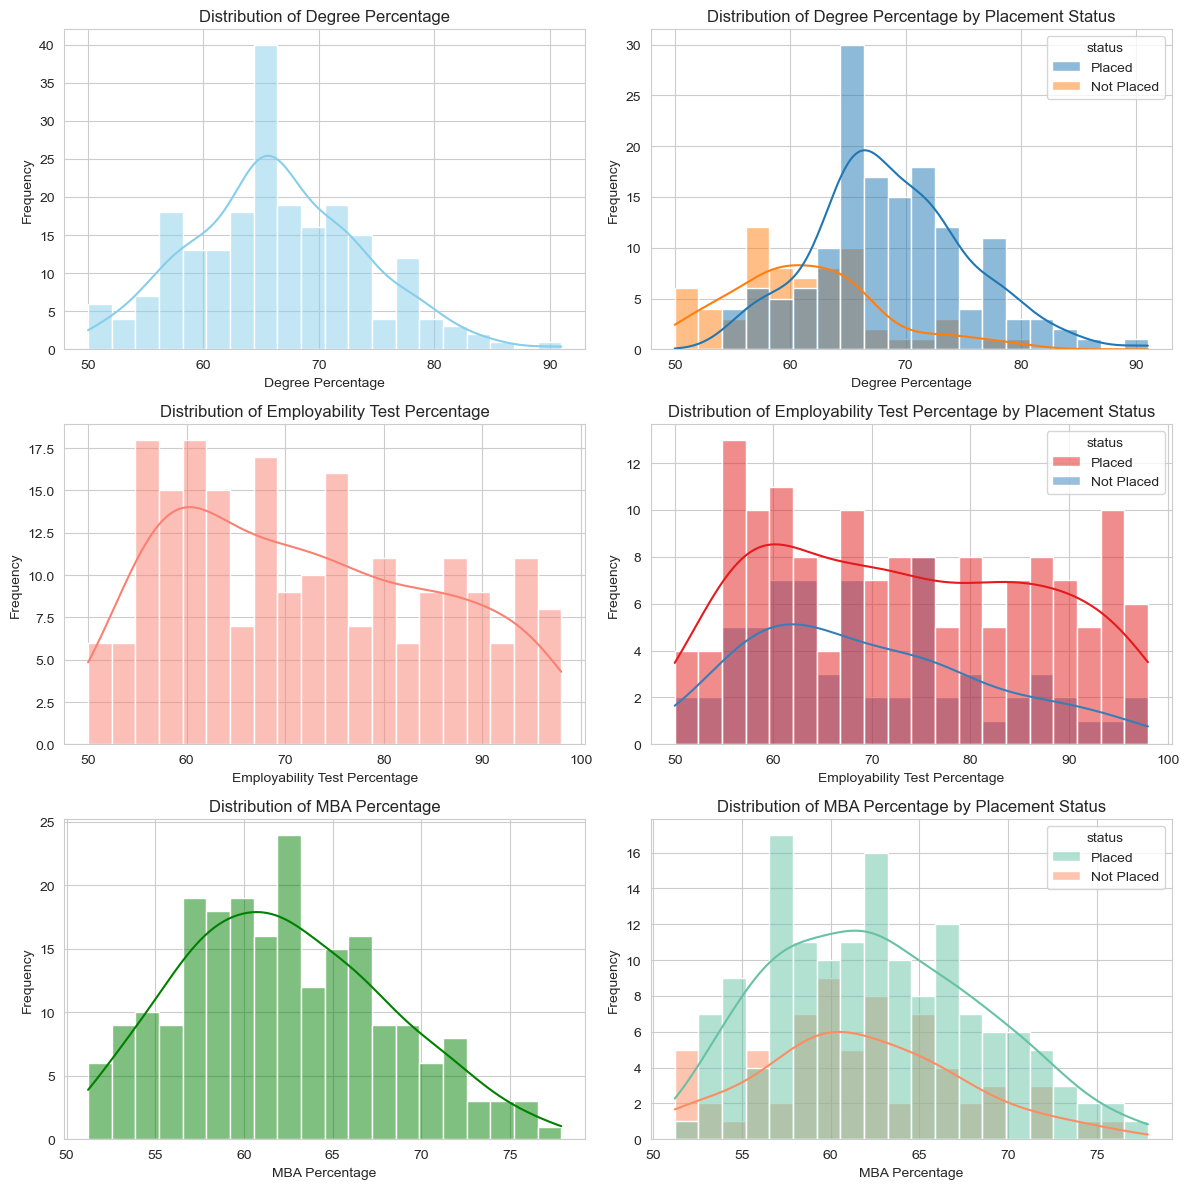

In [30]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here


# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot histograms for degree percentage
sns.histplot(data=df, x='degree_p', bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Degree Percentage')
axes[0, 0].set_xlabel('Degree Percentage')
axes[0, 0].set_ylabel('Frequency')

# Plot histograms for employability test percentage
sns.histplot(data=df, x='etest_p', bins=20, kde=True, color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Employability Test Percentage')
axes[1, 0].set_xlabel('Employability Test Percentage')
axes[1, 0].set_ylabel('Frequency')

# Plot histograms for MBA percentage
sns.histplot(data=df, x='mba_p', bins=20, kde=True, color='green', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of MBA Percentage')
axes[2, 0].set_xlabel('MBA Percentage')
axes[2, 0].set_ylabel('Frequency')

# Plot histograms for degree percentage by placement status
sns.histplot(data=df, x='degree_p', bins=20, kde=True, hue='status', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Degree Percentage by Placement Status')
axes[0, 1].set_xlabel('Degree Percentage')
axes[0, 1].set_ylabel('Frequency')

# Plot histograms for employability test percentage by placement status
sns.histplot(data=df, x='etest_p', bins=20, kde=True, hue='status', ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('Distribution of Employability Test Percentage by Placement Status')
axes[1, 1].set_xlabel('Employability Test Percentage')
axes[1, 1].set_ylabel('Frequency')

# Plot histograms for MBA percentage by placement status
sns.histplot(data=df, x='mba_p', bins=20, kde=True, hue='status', ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Distribution of MBA Percentage by Placement Status')
axes[2, 1].set_xlabel('MBA Percentage')
axes[2, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**Q:** Summarize the visualizations in the above six plots.<br>
> **A:** Distribution of degree percentage and MBA percentage form normal distributions respectively around 64-66 and around 60 percentage.<br><br>
>In distribution of degree percentage's placement not placed students form rights skewed normal distribution which mean around 60 while students who are placement set to as 'Placed' form greater central tendacy.<br><br>
>In distribution of degree percentage's both placed and not placed students show slightly same distribution which is a normal distribution with mean around 60 percentage

In [31]:
# Check for the null values in train set

# Your code goes here

null_values = X_train.isnull().sum()
null_values

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            55
dtype: int64

In [32]:
# Check for the null values in test set

# Your code goes here
null_values_test = X_test.isnull().sum()
null_values_test

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            12
dtype: int64

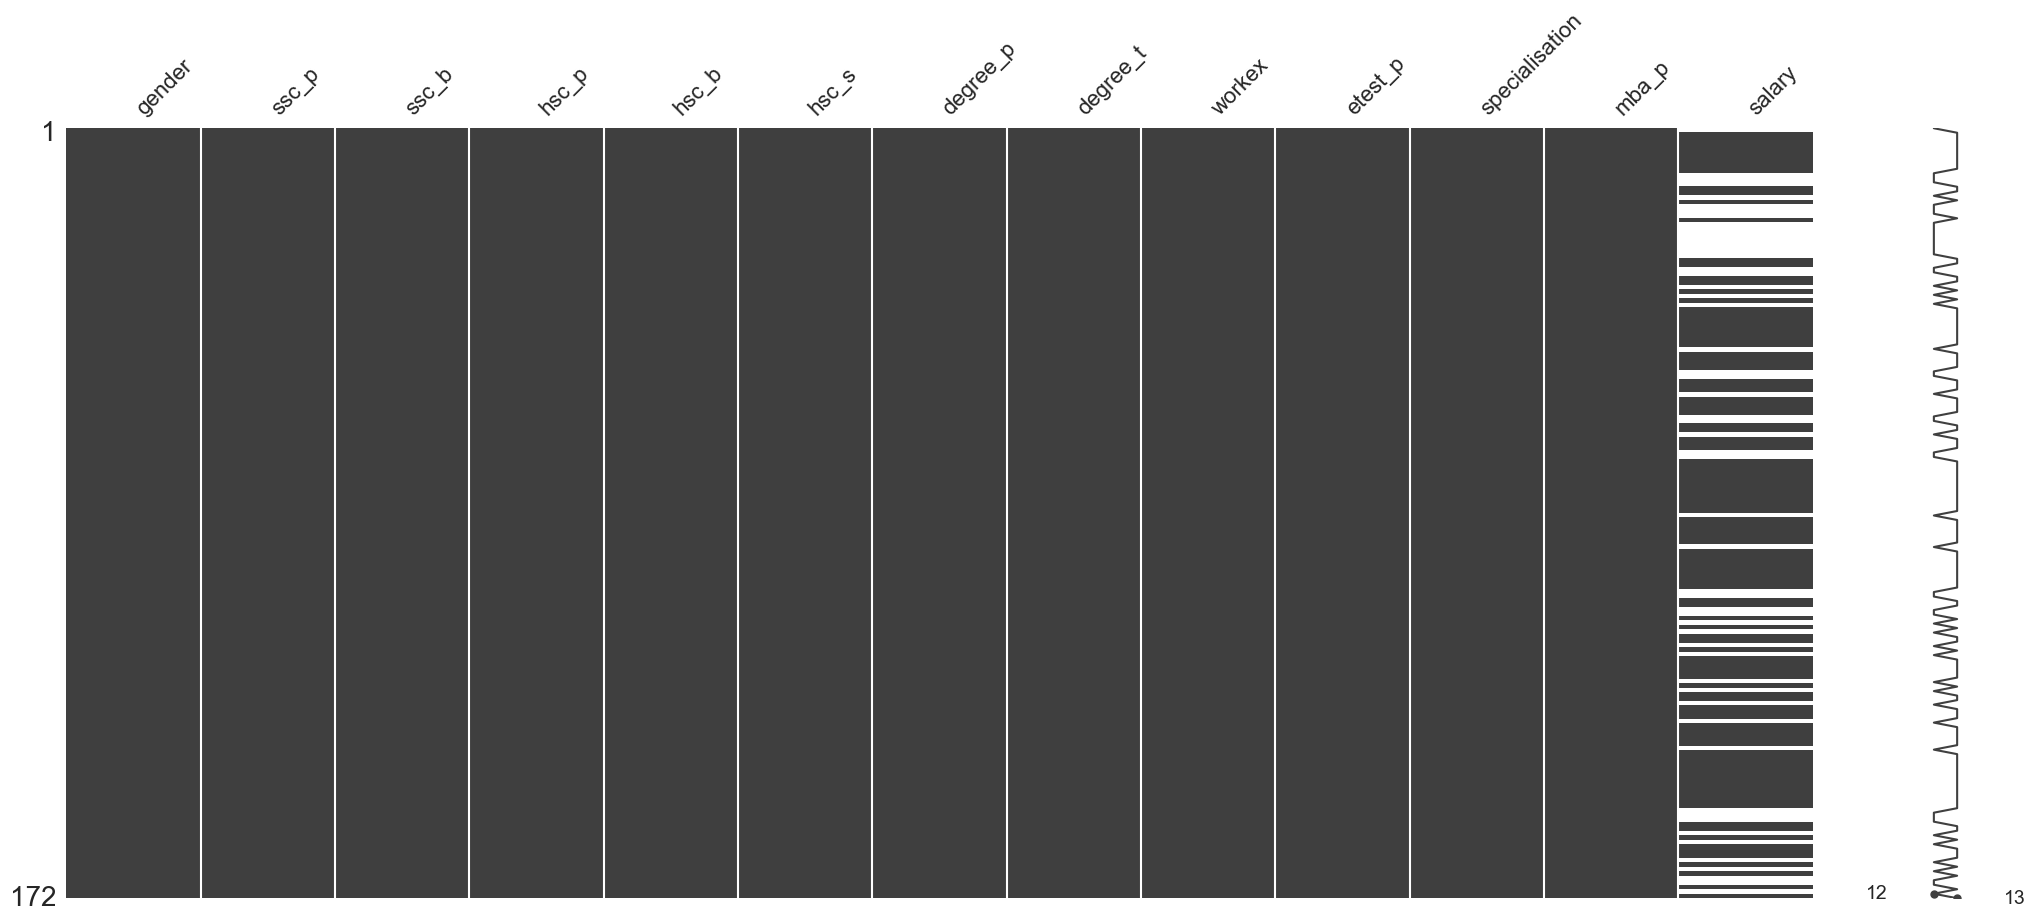

In [33]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
import missingno as msno

# Assuming your train set is stored in a DataFrame called 'train_data'
# Displaying the missing data matrix for the train set
msno.matrix(X_train)
plt.show()

## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:** In addressing the missing data within the 'salary' column, observed through the matrix plot, a strategic approach involves imputing these missing values with zeros. This method is justified by the nature of the data: the absence of a salary is directly linked to students not being placed. Consequently, setting the missing salaries to zero effectively reflects the reality that unplaced students do not earn a salary, maintaining the dataset's integrity and ensuring a logical representation of the employment outcomes. This approach avoids skewing the data analysis with potentially misleading statistics or imputations, providing a clear, factual basis for further analysis and modeling.


In [34]:
# Handle the missing data

# Your code goes here
X_train['salary'].fillna(0, inplace=True)

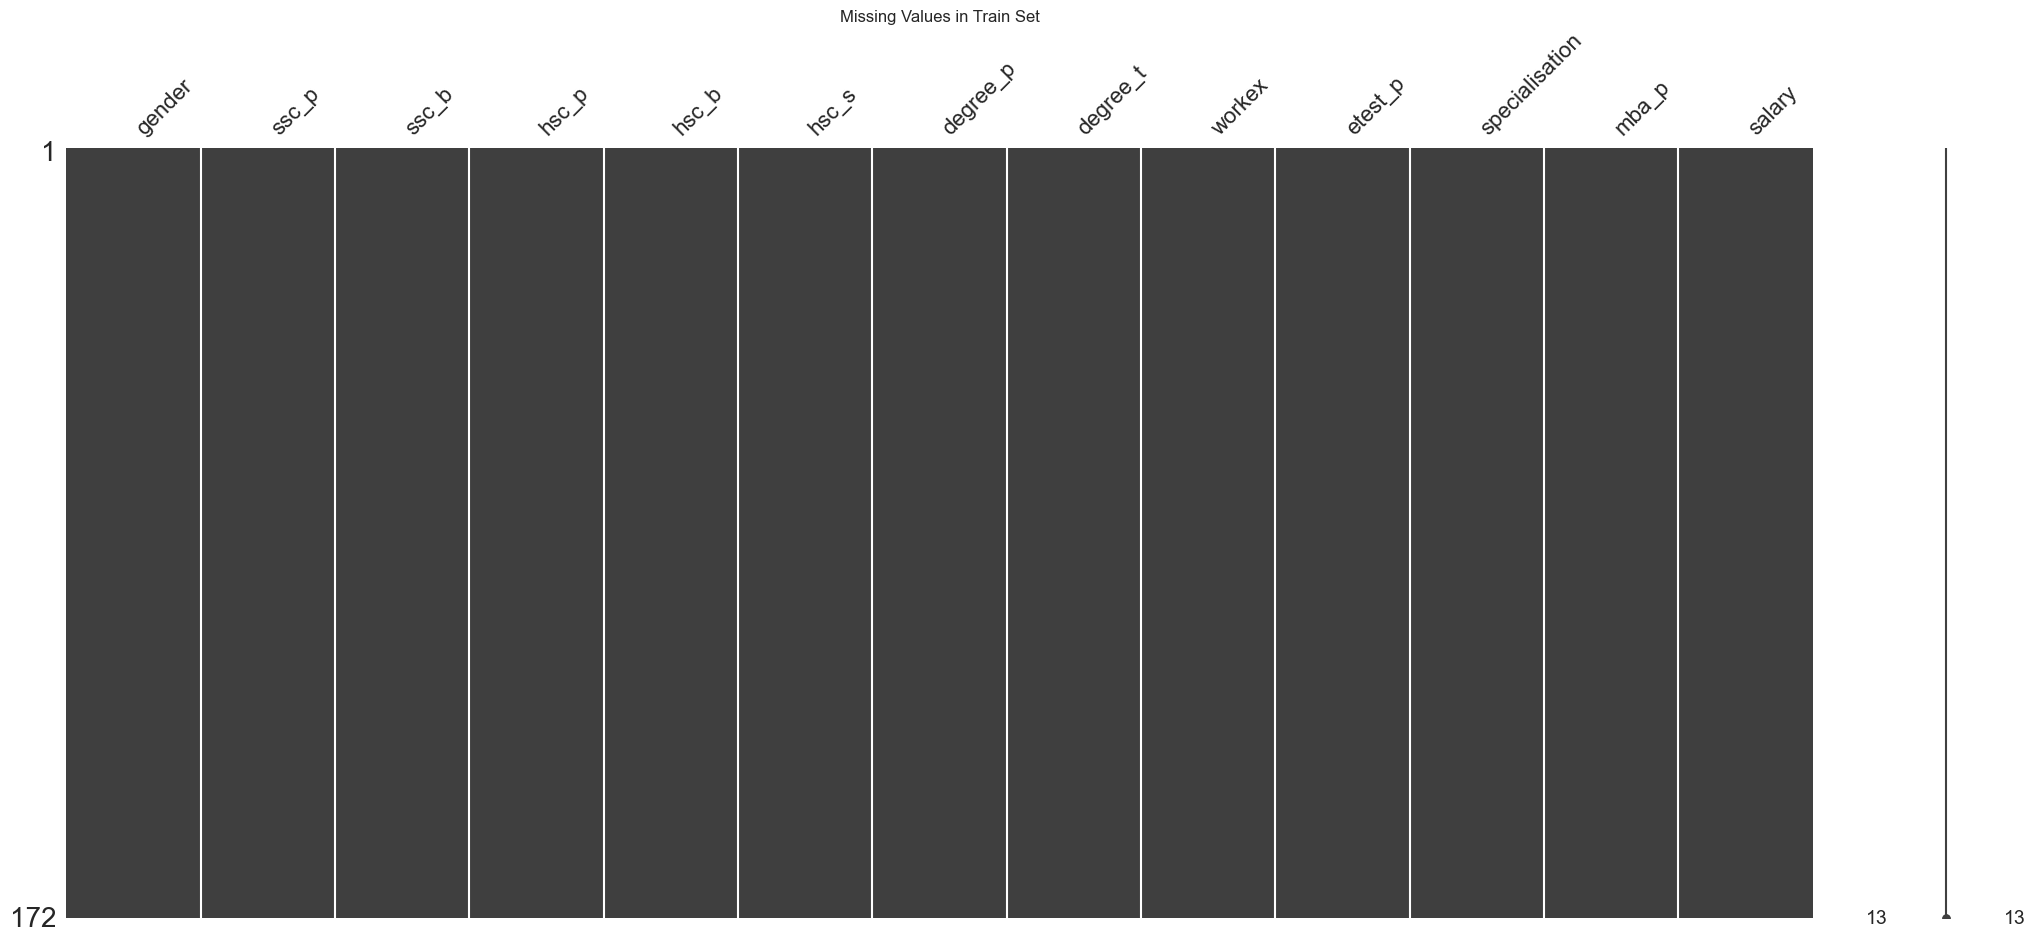

In [35]:
# Test the training dataset after processing the null values

# Your code goes here
msno.matrix(X_train)
plt.title('Missing Values in Train Set')
plt.show()

In [36]:
# Process the null values in the test set

# Your code goes here
X_test['salary'].fillna(0, inplace=True)

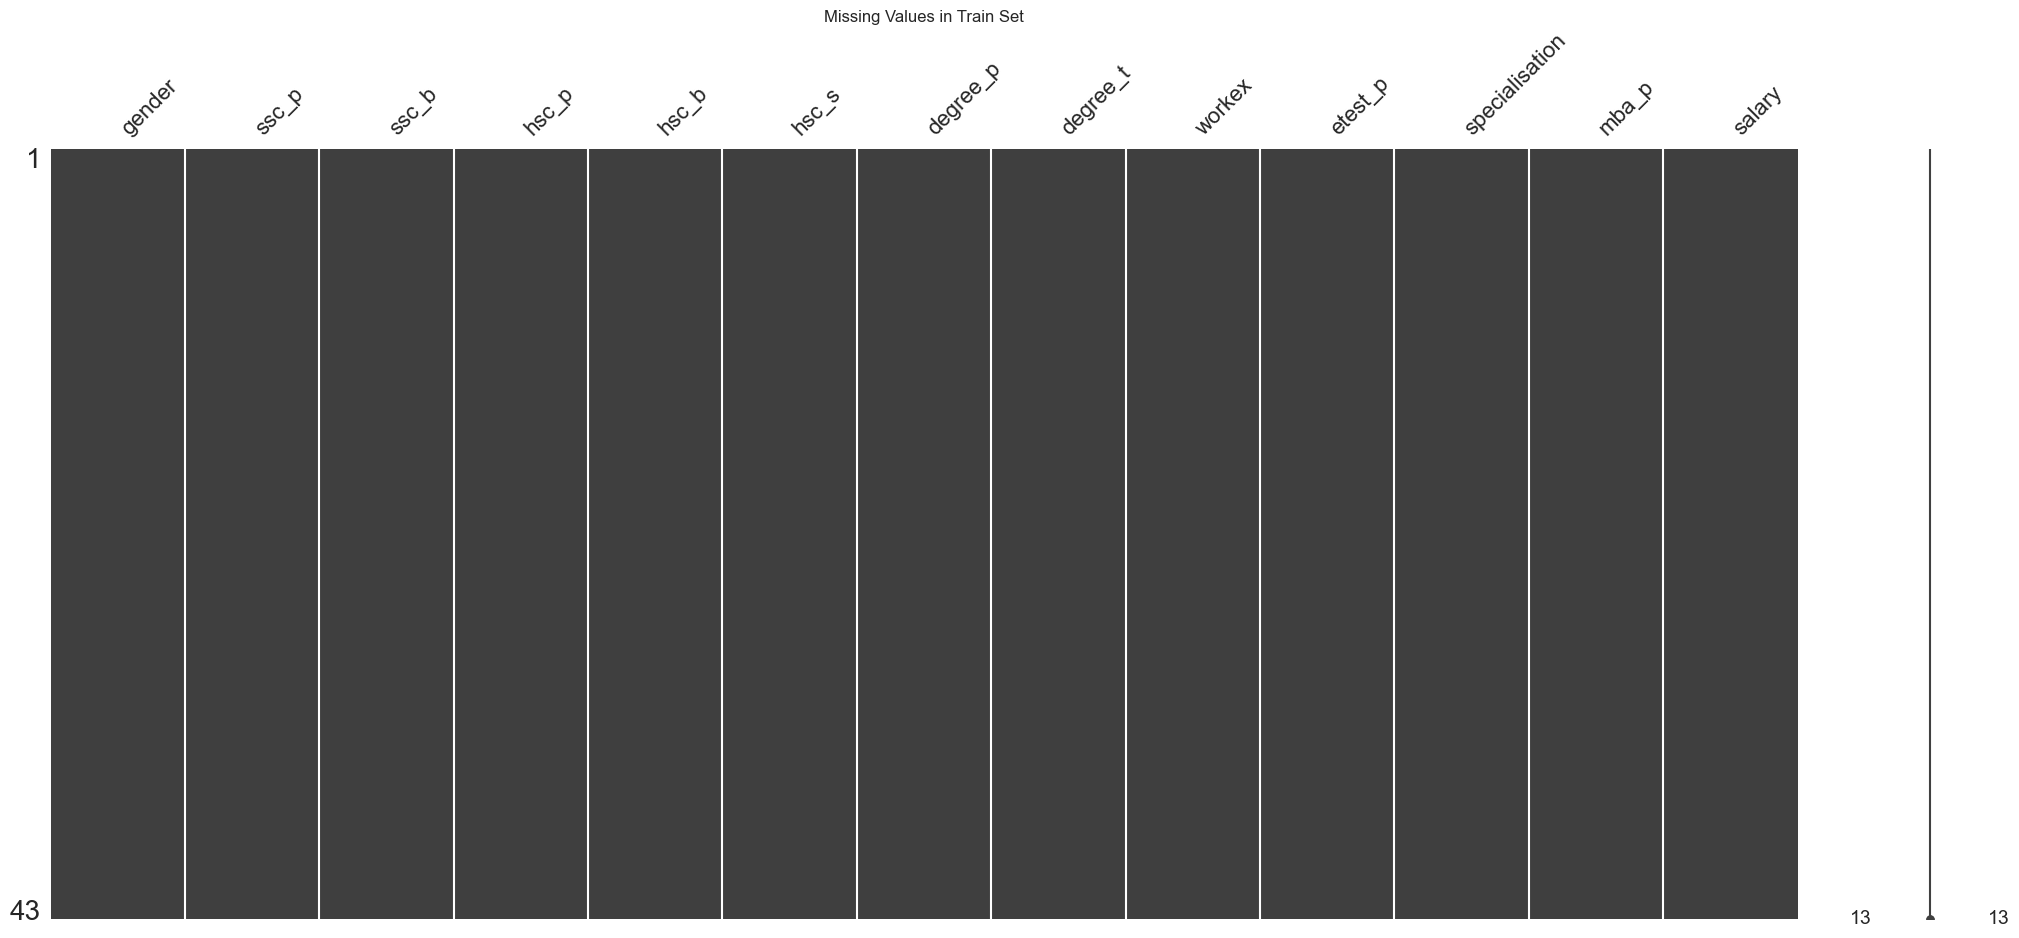

In [37]:
# Test the testing dataset after processing the null values

# Your code goes here
msno.matrix(X_test)
plt.title('Missing Values in Train Set')
plt.show()

### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:** One Hot Encoding method is used for every categorical value except status. Because One-hot encoding creates a separate column for each category, preserving the categorical nature of the variable.For status column, Label Encoding is use because Label encoding assigns integer labels preserving the ordinal relationship between the classes.

In [38]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here

from sklearn.preprocessing import OneHotEncoder
# List the categorical features

# Your code goes here
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
# Define the encoder
encoder = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    remainder='passthrough'  # to keep non-categorical features as is
)

# Encode the training features

# Your code goes here# Encode the training features
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

In [39]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here

# Get the column names from the encoder
encoded_column_names = encoder.named_transformers_['onehotencoder'].get_feature_names_out(categorical_features)

# Convert the encoded training features array to a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_column_names)

print("Data types of the Pandas DataFrame after transformation:")
print(X_train_encoded_df.dtypes)

Data types of the Pandas DataFrame after transformation:
gender_F                  float64
gender_M                  float64
ssc_b_Central             float64
ssc_b_Others              float64
hsc_b_Central             float64
hsc_b_Others              float64
hsc_s_Arts                float64
hsc_s_Commerce            float64
hsc_s_Science             float64
degree_t_Comm&Mgmt        float64
degree_t_Others           float64
degree_t_Sci&Tech         float64
workex_No                 float64
workex_Yes                float64
specialisation_Mkt&Fin    float64
specialisation_Mkt&HR     float64
dtype: object


In [40]:
# Encode the testing features

# Your code goes here
X_test_encoded = encoder.transform(X_test)

X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_column_names)

In [41]:
# Encode the target variable in train and test sets

# Your code goes here

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable in the train set
label_encoder.fit(y)

y_train_encoded = label_encoder.transform(y_train)

# Encode the target variable in the test set
y_test_encoded = label_encoder.transform(y_test)

In [42]:
# Print the encoded labels for the training set

# Your code goes here

print("Encoded labels for the training set:")
print(y_train_encoded)

Encoded labels for the training set:
[0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1]


### Scale the Numerical Features

In [43]:
# Standard Scale the numerical features


# Instantiate StandardScaler
scaler = StandardScaler()

# Define the numerical features (assuming all features except categorical ones are numerical)
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Remove salary column to prevent overfitting
numerical_features = numerical_features.drop('salary')

# Standard scale the numerical features in the train set
X_train_scaled = X_train[numerical_features]
X_train_scaled = scaler.fit_transform(X_train_scaled[numerical_features])
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=numerical_features)

# Standard scale the numerical features in the test set
X_test_scaled = X_test[numerical_features]
X_test_scaled = scaler.transform(X_test_scaled[numerical_features])
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=numerical_features)

In [44]:
# Display the head of the scaled training set
pd.concat([pd.DataFrame(X_train_scaled,columns=numerical_features),X_train_encoded_df],axis=1)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,-1.394730,-0.354257,-1.601854,-0.051326,-1.151702,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.262928,-0.266971,0.517889,-1.326412,-0.038470,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.539205,1.042309,-0.144531,1.708292,-0.011442,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.013348,-0.266971,0.782857,-1.251407,-0.307065,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.239105,1.391451,1.524767,1.373770,2.071433,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,-0.558534,-1.401682,-1.601854,-0.126331,0.584872,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
168,-0.473809,-1.663538,-2.131790,0.248694,-1.227719,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
169,-0.636812,0.256741,-0.012047,-0.051326,-0.465857,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
170,0.981247,-0.179686,-0.250518,0.211192,1.674453,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [45]:
# Display the head of the scaled testing set
X_train_scaled = pd.concat([X_train_scaled_df, X_train_encoded_df],axis=1)
X_test_scaled = pd.concat([X_test_scaled_df, X_test_encoded_df],axis=1)

X_train_scaled.columns = X_train_scaled.columns.astype(str)
X_test_scaled.columns = X_test_scaled.columns.astype(str)

In [46]:
# Display the head of the scaled training set
print("Head of the scaled training set:")
X_train_scaled.head()

Head of the scaled training set:


,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,-1.394730,-0.354257,-1.601854,-0.051326,-1.151702,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.262928,-0.266971,0.517889,-1.326412,-0.038470,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.539205,1.042309,-0.144531,1.708292,-0.011442,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.013348,-0.266971,0.782857,-1.251407,-0.307065,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.239105,1.391451,1.524767,1.373770,2.071433,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [47]:
# Display the head of the scaled testing set
print("Head of the scaled testing set:")
X_test_scaled.head()

Head of the scaled testing set:


,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0.170836,-0.528828,-0.144531,1.115002,-1.590913,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.013348,0.082170,0.915341,-1.026392,1.265649,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.368034,-0.179686,0.915341,1.748795,1.611950,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.750085,-0.528828,-1.336886,-1.326412,-0.731073,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.197532,0.780453,0.385405,-0.051326,0.410877,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:** SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method used to balance dataset class distributions. It generates synthetic samples by interpolating between existing minority class instances, thereby creating a more balanced dataset that improves the training of machine learning models on imbalanced data.<br><br>
> **A2 (Advantage):** The primary advantage of using SMOTE over other oversampling techniques is its ability to generate more diverse and representative samples of the minority class. While simple oversampling methods, like random oversampling, can lead to overfitting by replicating the same instances and not adding new information, SMOTE creates synthetic samples close to the original ones yet with minor variations. This introduces more variability into the training process, helping models to learn more generalized patterns rather than memorizing specific instances. Consequently, models trained on datasets augmented with SMOTE are often better at predicting outcomes for unseen data, especially in cases where the minority class is of significant interest 

In [48]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here


# Instantiate SMOTE
smote = SMOTE()

# Oversample the training set
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train_encoded)

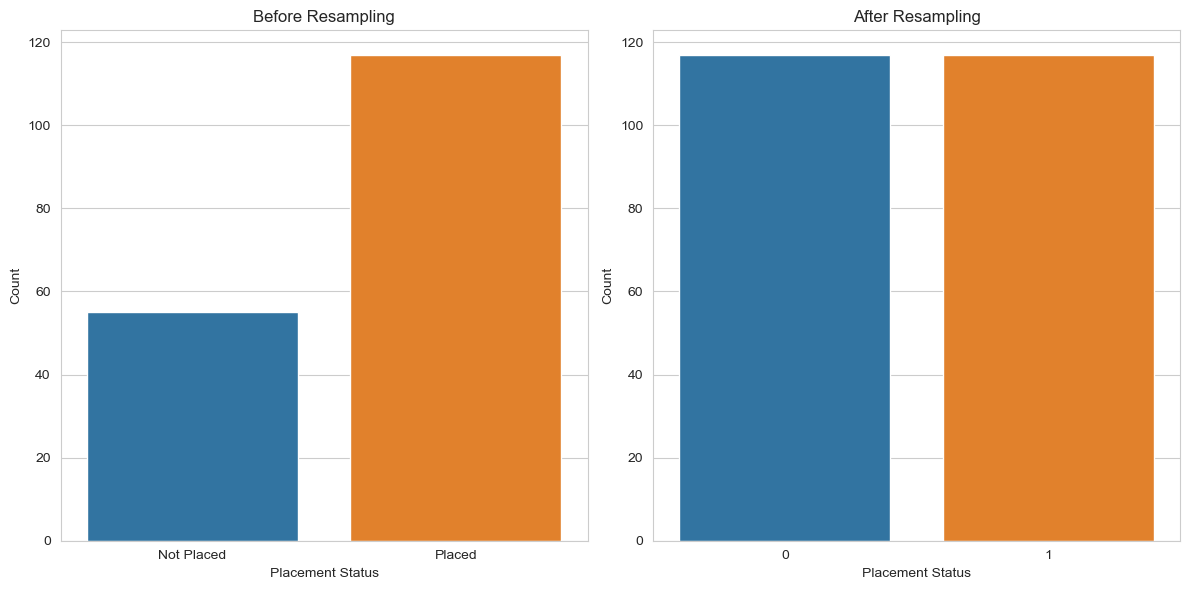

In [49]:
# plot the count plots side by side before and after resampling

# Your code goes here


# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot count plots before and after resampling
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Before Resampling')
axes[0].set_xlabel('Placement Status')
axes[0].set_ylabel('Count')

sns.countplot(x=y_train_oversampled, ax=axes[1])
axes[1].set_title('After Resampling')
axes[1].set_xlabel('Placement Status')
axes[1].set_ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:** 
No, we should not oversample the testing set. The purpose of the testing set is to evaluate the model's performance in conditions that mimic real-world scenarios as closely as possible. Since real-world data is likely to be imbalanced, oversampling the testing set would create an unrealistic evaluation environment. It would not provide an accurate measure of how the model would perform on unseen, imbalanced data. The testing set should reflect the true distribution of classes to ensure that the model's predictions are robust and reliable across different scenarios. Oversampling is only applied during the training phase to help the model learn from a balanced distribution of classes.

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [ ]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here

In [50]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here

# Define the steps for the pipeline
steps = [
    ('smote', SMOTE()),  # Oversampling using SMOTE
    ('classifier', SVC())  # Classifier (SVC)
]

# Define the imbalanced pipeline
imbalanced_pipeline = Pipeline(steps)

In [51]:
# Define stratified k-fold cross validation with five folds

# Your code goes here


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:** Stratified K-Folds cross-validation is crucial for preserving the proportion of each class within each fold of the dataset during the model training process. This approach is particularly important in imbalanced datasets where the class distribution is skewed. By ensuring each fold has a representative distribution of the classes, it helps in maintaining the integrity of the dataset's original class proportions, leading to more reliable and unbiased model evaluation and selection. This technique enhances the model's ability to generalize well to unseen data by preventing overfitting to the majority class and under-representation of the minority class in the training folds.

In [52]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here

# Define parameter grid for grid search
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Hyperparameter C for SVC
    'classifier__kernel': ['linear', 'rbf'],  # Hyperparameter kernel for SVC
}

In [53]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here

# Define GridSearchCV instance
grid_search = GridSearchCV(estimator=imbalanced_pipeline,
                           param_grid=param_grid,
                           cv=skf,
                           scoring='accuracy',
                           n_jobs=-1)

In [54]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
grid_search.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy')

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [55]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
print("Mean cross-validated score of the best estimator (Accuracy):", grid_search.best_score_)

Mean cross-validated score of the best estimator (Accuracy): 0.8541176470588235


In [56]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'classifier__C': 1, 'classifier__kernel': 'linear'}


In [57]:
# Obtain the best estimator selected from the grid search

# Your code goes here

best_estimator = grid_search.best_estimator_

### Model Evaluation

In [58]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_estimator.fit(X_train_scaled, y_train_encoded)

Pipeline(steps=[('smote', SMOTE()), ('classifier', SVC(C=1, kernel='linear'))])

In [59]:
# Calculate the accuracy considering the complete traing set

# Your code goes here


y_train_pred = best_estimator.predict(X_train_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_train_encoded, y_train_pred)
print("Accuracy on the complete training set:", accuracy)

Accuracy on the complete training set: 0.9011627906976745


In [60]:
# Calculate the accuracy for the test set

# Your code goes here

y_test_pred = best_estimator.predict(X_test_scaled)

# Calculate the accuracy for the test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print("Accuracy on the test set:", test_accuracy)

Accuracy on the test set: 0.8604651162790697


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:** The model exhibits a slight overfitting, as evidenced by the higher accuracy on the training set compared to the test set. Despite this, both accuracies are relatively high, indicating a decent performance of the model on both datasets.*

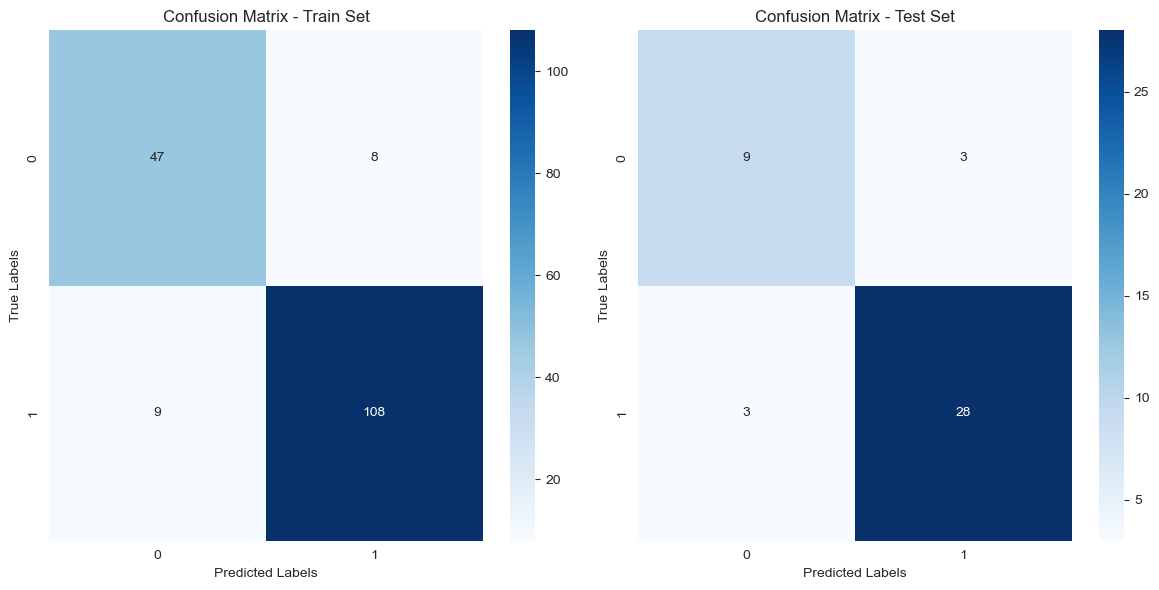

In [61]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here

# Generate confusion matrix for the train set
conf_matrix_train = confusion_matrix(y_train_encoded, y_train_pred)

# Generate confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for train set
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Train Set')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot confusion matrix for test set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Show plot
plt.tight_layout()
plt.show()

**Q:** Comment about the obtained confusion matrices. <br>
> **A:** The model performs well in identifying true negatives and true positives on both the training and testing sets.<br>
However, there are some false positives and false negatives, indicating areas where the model misclassifies instances.<br><br>
The comparatively low amount of false positives and false negatives indicates that while the model's performance is adequate, it still has room for improvement.

In [62]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here

class_report = classification_report(y_test_encoded, y_test_pred)

# Print the classification report
print("Classification Report for the Test Set:\n", class_report)

Classification Report for the Test Set:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**
1. Precision: This measures the accuracy of the positive predictions. It's defined as the ratio of true positive predictions to the total number of positive predictions (i.e., the sum of true positives and false positives). For class 0, the precision is 0.75, meaning 75% of the instances predicted as class 0 are actually class 0. For class 1, it's 0.90, indicating a higher reliability in the model's predictions for class 1.<br>
2. Recall (Sensitivity): This measures the ability of the classifier to find all the positive samples. It's calculated as the ratio of true positives to the sum of true positives and false negatives. For class 0, the recall is 0.75, indicating that the model correctly identifies 75% of all actual class 0 instances. For class 1, the recall is also 0.90, suggesting the model is quite effective at identifying class 1 instances.<br>
3. F1-Score: This is the harmonic mean of precision and recall, providing a single metric to assess the balance between them. An F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0. Class 0 has an F1-score of 0.75, and class 1 has an F1-score of 0.90, indicating that the model performs better on class 1 than class 0 in terms of both precision and recall. <br>
4. Support: This is the number of actual occurrences of the class in the specified dataset. For class 0, there are 12 instances, and for class 1, there are 31 instances.<br>
5. Macro Average: This calculates the mean of the metric independently for each class before taking the average. This treats all classes equally, regardless of their support. The macro average for precision, recall, and F1-score are all 0.83, indicating a strong performance across classes, without weighting by class size.

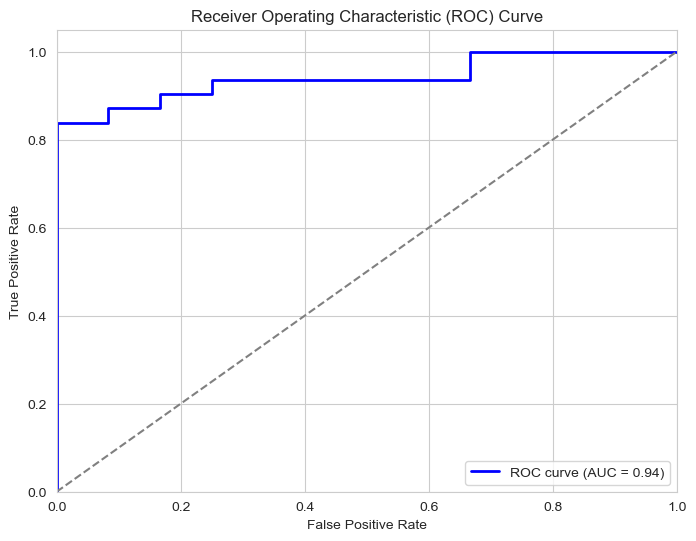

Area Under Curve (AUC): 0.9408602150537634


In [63]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the decision function scores for the test set
y_test_scores = best_estimator.decision_function(X_test_scaled)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_scores)

# Calculate AUC
auc = roc_auc_score(y_test_encoded, y_test_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC value
print("Area Under Curve (AUC):", auc)

**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:
The ROC curve (Receiver Operating Characteristic curve) is a graphical representation that illustrates the performance of a binary classification model at various threshold settings by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR). The AUC value (Area Under the Curve) quantifies the overall ability of the model to discriminate between positive and negative classes, with a value of 1 representing perfect prediction, 0.5 indicating no better than random guessing, and values closer to 1 indicating higher model performance. Together, the ROC curve and AUC provide a comprehensive measure of model accuracy, helping to select the best threshold for classification and comparing different models**
<br> <br>
>*With an AUC value of 0.94, the model demonstrates excellent discriminative ability, indicating that it can effectively distinguish between the positive and negative classes.<br><br><br>
>*This excellence is visually represented by the ROC curve, which sharply ascends towards the top-left corner, far from the diagonal, indicating a high level of prediction accuracy..<br><br>
>*Given the ROC curve's shape and the impressive AUC score, it is evident that the model performs exceptionally well in accurately classifying the instances into the correct categories, confirming its robustness for the task at hand.